# Programming Assignment 1: Descision Trees

Student: Cohen Archbold

Class: CS 460g



In [1]:
import pandas as pd
import numpy as np

# Preparing and Binning Synthetic Data

In [2]:
# Read in the sythetic datasets
synthetic1_df = pd.read_csv('PokemonData/synthetic-1.csv')
synthetic2_df = pd.read_csv('PokemonData/synthetic-2.csv')
synthetic3_df = pd.read_csv('PokemonData/synthetic-3.csv')
synthetic4_df = pd.read_csv('PokemonData/synthetic-4.csv')

# Lets put the originals in a list for future use
unmodified_df_list = [synthetic1_df, synthetic2_df, synthetic3_df, synthetic4_df]

In [3]:
#Lets take a peak
synthetic1_df.head()

,10.58,-0.055609,1
0,10.8130,0.77631,1
1,8.7405,1.26280,1
2,11.1840,4.37280,1
3,12.2720,-2.39240,1
4,10.8260,2.57780,1


In [4]:
# So it looks like the keys are weird... lets fix them

synthetic1_df.columns = ['x' ,'y', 'z']

synthetic2_df.columns = ['x' ,'y', 'z']

synthetic3_df.columns = ['x' ,'y', 'z']

synthetic4_df.columns = ['x' ,'y', 'z']

df_list[0].head()

NameError: name 'df_list' is not defined

In [5]:
#Great! Now we need to bin the columns x and y for each dataframe

#Lets make a list of all dataframes

df_list = [synthetic1_df.copy(), synthetic2_df.copy(), synthetic3_df.copy(), synthetic4_df.copy()]

quantiles = 4

#Loop through the list and bin each x and y column
for df in df_list:
    df['x'] = pd.qcut(df['x'], q=quantiles)
    df['y'] = pd.qcut(df['y'], q=quantiles)

df_list[0].head()


,x,y,z
0,"(10.018, 12.996]","(-2.393, 1.24]",1
1,"(2.87, 10.018]","(1.24, 2.598]",1
2,"(10.018, 12.996]","(3.851, 8.213]",1
3,"(10.018, 12.996]","(-2.393, 1.24]",1
4,"(10.018, 12.996]","(1.24, 2.598]",1


# Descision Trees Training



In [6]:
import d_trees as dt
#Lets keep a list of all the trees for the synthetic sets
trees = []

#for each DataFrame, make a new tree and store the root
for df in df_list:
    trees.append( dt.D_Tree(df, 'z', ['x','y']) )

# Lets Calculate the Accuracy of Each of these Trees
    This will be done on the original training data

In [7]:
# Lets calculate the accuracies and put them in a list
accuracies = []

for tree in trees:
    accuracies.append(tree.get_accuracy('z'))

In [8]:
# Lets Print the Accuracies

df_names = ['Synthetic1', 'Synthetic2', 'Synthetic3', 'Synthetic4']

for index, acc in enumerate(accuracies):
    print(df_names[index] + ' Accuracy: ' + str(acc))

Synthetic1 Accuracy: 1.0
Synthetic2 Accuracy: 0.964824120603015
Synthetic3 Accuracy: 0.8743718592964824
Synthetic4 Accuracy: 0.8442211055276382


# Graphing The Descision Boundaries
    For each of the synthetic sets, lets graph the descision boundaries

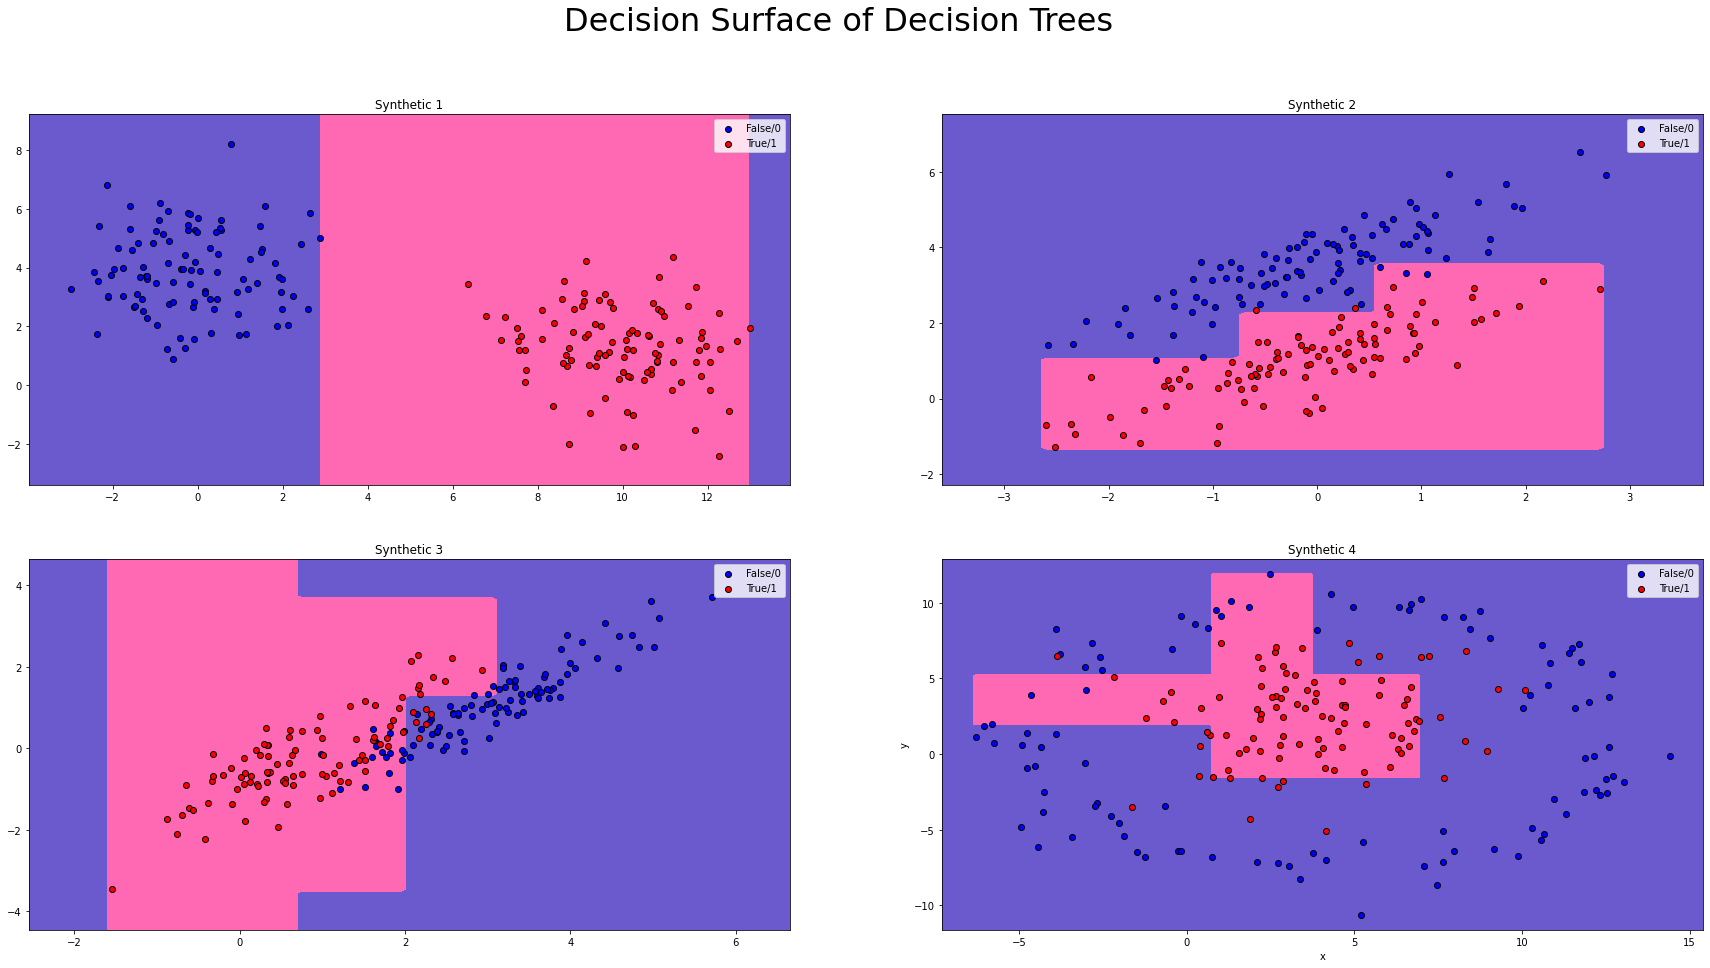

In [9]:
import matplotlib.pyplot as plt 

plot_colors = ['blue', 'red']
plot_step = 0.1

curr_plot = 0

dataset_names = ['Synthetic 1','Synthetic 2','Synthetic 3', 'Synthetic 4']

fig, axs = plt.subplots(2, 2, figsize=(30,15))

# For each subplot
for ax in axs.flat:
    plot_data = unmodified_df_list[curr_plot]

    #Setting the maxes and mins of the graph
    x_min, x_max = plot_data['x'].min() -1, plot_data['x'].max() +1
    y_min, y_max = plot_data['y'].min() -1, plot_data['y'].max() +1
    #create a grid of the points along the graph
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

    #mesh data
    mesh_points = pd.DataFrame( data = np.c_[xx.ravel(), yy.ravel()], columns=['x','y'] )
    Z = trees[curr_plot].get_predictions( mesh_points )
    Z = np.reshape(Z, xx.shape)

    # Plot the mesh
    cs = ax.contourf(xx, yy, Z, colors = ['slateblue','hotpink'], levels= 1)
    ax.axis("tight")

    plt.xlabel('x')
    plt.ylabel('y')

    # Plot the original data points
    ax.scatter(plot_data.loc[plot_data['z'] == 0]['x'], plot_data.loc[plot_data['z'] == 0]['y'], c = 'b', cmap=plt.cm.Paired, label = 'False/0', edgecolors='k')

    ax.scatter(plot_data.loc[plot_data['z'] == 1]['x'], plot_data.loc[plot_data['z'] == 1]['y'], c = 'r', cmap=plt.cm.Paired, label = 'True/1', edgecolors='k')

    ax.axis("tight")

    # Set title and up data index
    ax.set_title(dataset_names[curr_plot])
    curr_plot += 1
    ax.legend()

plt.suptitle("Decision Surface of Decision Trees", fontsize = 32)
plt.show()

fig.savefig('Surface_graphs.jpg')



# Making Descision Trees for the Pokemon Dataset
    First lets look at the data...

In [10]:
stats_df     = pd.read_csv('PokemonData/pokemonStats.csv')
legendary_df = pd.read_csv('PokemonData/pokemonLegendary.csv')

#Lets combine the two datasets into one
combined = [stats_df, legendary_df]
combined_df  = pd.concat(combined, axis =1)

In [11]:
combined_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Legendary
0,318,45,49,49,65,65,45,1,0,0,...,0,0,0,0,1,0,0,0,0,False
1,405,60,62,63,80,80,60,1,0,0,...,0,0,0,0,1,0,0,0,0,False
2,525,80,82,83,100,100,80,1,0,0,...,0,0,0,0,1,0,0,0,0,False
3,625,80,100,123,122,120,80,1,0,0,...,0,0,0,0,1,0,0,0,0,False
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,False


In [12]:
# Here we need to bin the interval parts of this dataset

pokemon_quantiles = 10

binning = ['Total','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

for column in binning:
    combined_df[column] = pd.qcut(combined_df[column], q=pokemon_quantiles)

# Convert Legendary to Zero and One, cosmetic only
combined_df['Legendary'] = combined_df['Legendary'].astype(int)
combined_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Legendary
0,"(309.0, 390.0]","(0.999, 49.0]","(4.999, 50.0]","(45.0, 60.0]","(58.0, 70.0]","(59.0, 70.0]","(40.0, 55.0]",1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"(390.0, 466.0]","(58.0, 65.0]","(50.0, 65.0]","(60.0, 70.0]","(70.0, 85.0]","(70.0, 80.0]","(55.0, 66.0]",1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,"(510.0, 580.0]","(75.0, 80.0]","(75.0, 86.0]","(78.0, 86.0]","(95.0, 105.0]","(95.0, 100.0]","(66.0, 80.0]",1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,"(600.0, 672.0]","(75.0, 80.0]","(95.0, 101.0]","(122.0, 230.0]","(119.0, 130.0]","(109.2, 127.0]","(66.0, 80.0]",1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,"(179.999, 309.0]","(0.999, 49.0]","(50.0, 65.0]","(4.999, 45.0]","(58.0, 70.0]","(45.0, 59.0]","(55.0, 66.0]",1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Lets get a list of attributes
attributes = combined_df.columns.values.tolist()
attributes.remove('Legendary')
print(attributes)

# Create the Tree
pokemon_tree = dt.D_Tree(combined_df, 'Legendary', attributes)


['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice', 'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water']


In [14]:
print(pokemon_tree)

Root- Tree Node: Label(0/1 yes/no) -1|| Splitting: Total Attribute: None
	Child- Tree Node: Label(0/1 yes/no) 0|| Splitting: None Attribute: (309.0, 390.0]
	Child- Tree Node: Label(0/1 yes/no) 0|| Splitting: None Attribute: (390.0, 466.0]
	Child- Tree Node: Label(0/1 yes/no) -1|| Splitting: HP Attribute: (510.0, 580.0]
		GrandChild- Tree Node: Label(0/1 yes/no) 0|| Splitting: None Attribute: (0.999, 49.0]
		GrandChild- Tree Node: Label(0/1 yes/no) 0|| Splitting: None Attribute: (58.0, 65.0]
		GrandChild- Tree Node: Label(0/1 yes/no) 1|| Splitting: None Attribute: (75.0, 80.0]
		GrandChild- Tree Node: Label(0/1 yes/no) 0|| Splitting: None Attribute: (49.0, 58.0]
		GrandChild- Tree Node: Label(0/1 yes/no) 1|| Splitting: None Attribute: (80.0, 87.0]
		GrandChild- Tree Node: Label(0/1 yes/no) 0|| Splitting: None Attribute: (65.0, 75.0]
		GrandChild- Tree Node: Label(0/1 yes/no) 1|| Splitting: None Attribute: (87.0, 95.0]
		GrandChild- Tree Node: Label(0/1 yes/no) 0|| Splitting: None Attrib

In [15]:
print("Pokemon Tree Accuracy: " + str(pokemon_tree.get_accuracy('Legendary')))

Pokemon Tree Accuracy: 0.8040816326530612
